Всего отрезков: 10
Всего пересечений: 6
Отрезки 0 и 8 пересекаются
Отрезки 0 и 9 пересекаются
Отрезки 2 и 3 пересекаются
Отрезки 2 и 5 пересекаются
Отрезки 5 и 7 пересекаются
Отрезки 6 и 8 пересекаются


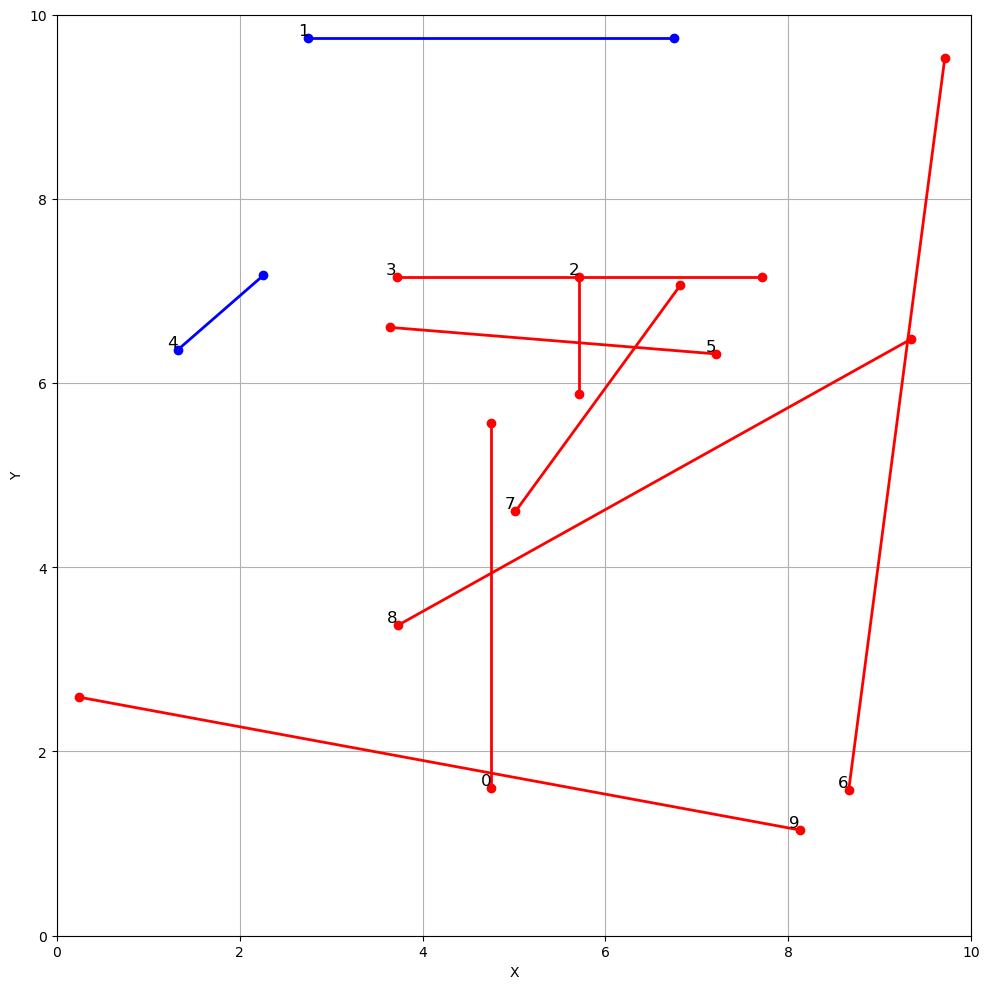

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import itertools


def generate_random_segments(n=10, min_intersections=2, coord_range=(0, 10)):
    # Создаем массив для хранения отрезков: (n, 2, 2), где каждый отрезок описывается двумя точками (x1,y1)-(x2,y2)
    segments = np.zeros((n, 2, 2))

    # Генерируем min_intersections пар пересекающихся отрезков
    for i in range(0, min_intersections * 2, 2):
        # Первый отрезок (горизонтальный или вертикальный)
        if np.random.choice([True, False]):
            # Горизонтальный отрезок
            y = np.random.uniform(*coord_range)
            x1, x2 = np.random.uniform(*coord_range, size=2)
            segments[i] = np.array([[x1, y], [x2, y]])
        else:
            # Вертикальный отрезок
            x = np.random.uniform(*coord_range)
            y1, y2 = np.random.uniform(*coord_range, size=2)
            segments[i] = np.array([[x, y1], [x, y2]])

        # Второй отрезок, гарантированно пересекающий первый
        if segments[i, 0, 0] == segments[i, 1, 0]:  # Первый вертикальный → второй горизонтальный
            x = segments[i, 0, 0]
            y = np.random.uniform(*coord_range)
            segments[i + 1] = np.array([[x - 2, y], [x + 2, y]])  # Пересекает первый
        else:  # Первый горизонтальный → второй вертикальный
            y = segments[i, 0, 1]
            x = np.random.uniform(*coord_range)
            segments[i + 1] = np.array([[x, y - 2], [x, y + 2]])  # Пересекает первый

    # Остальные отрезки — случайные
    for i in range(min_intersections * 2, n):
        segments[i] = np.random.uniform(*coord_range, size=(2, 2))

    return segments


def cross(v1, v2):
    return v1[0] * v2[1] - v2[0] * v1[1]


def find_intersections(segments):
    n = len(segments)
    intersections = []

    for i, j in itertools.combinations(range(n), 2):
        seg1, seg2 = segments[i], segments[j]
        s1, e1 = seg1[0], seg1[1]
        s2, e2 = seg2[0], seg2[1]

        cross1 = cross(s2 - s1, e1 - s1)
        cross2 = cross(e2 - s1, e1 - s1)
        cross3 = cross(s1 - s2, e2 - s2)
        cross4 = cross(e1 - s2, e2 - s2)
        if (cross1 * cross2 <= 0) and (cross3 * cross4 <= 0):
            intersections.append((i, j))
    return intersections


def plot_segments(segments, intersections_set):
    plt.figure(figsize=(10, 10))

    for i, seg in enumerate(segments):
        if i in intersections_set:
            plt.plot(seg[:, 0], seg[:, 1], marker='o', color='red', label=f'Segment {i}', linewidth=2)
        else:
            plt.plot(seg[:, 0], seg[:, 1], marker='o', color='blue', label=f'Segment {i}', linewidth=2)
        x, y = seg[0]
        plt.text(x, y, f'{i}', fontsize=12, ha='right', va='bottom', color='black')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.tight_layout()
    plt.show()


# np.random.seed(42)
segments = generate_random_segments(n=10, min_intersections=2)

intersections = find_intersections(segments)
intersections_set = set()
print(f"Всего отрезков: {len(segments)}")
print(f"Всего пересечений: {len(intersections)}")
for i, j in intersections:
    print(f"Отрезки {i} и {j} пересекаются")
    intersections_set.add(i)
    intersections_set.add(j)

plot_segments(segments, intersections_set)
print()